In [1]:
import pandas as pd
import numpy as np
import os
import sys
import random
from itertools import product
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


sys.path.extend([
    '../src',
    '../data',
    '../utils',
    '../plot'

])

from utils import run_nested_cv, create_sliding_windows, time_rf_inference_for_subject



if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

#limb
right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], 
                      ignore_index=True)

architecture = {
               'num_filters': [50, 25],
               'filter_sizes': [5, 5],
               'pool_sizes': [5, 5]
               }

CPU


2025-07-04 23:05:57.675740: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.523


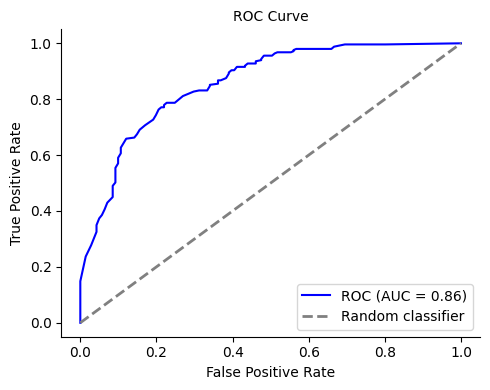

Limb: 1 Subject: 1 Youden Index: 0.633078231292517 Sensitivity: 0.9455782312925171 Specificity: 0.6875
Limb: 2 Subject: 1 Youden Index: 0.4022770398481974 Sensitivity: 0.8431372549019608 Specificity: 0.5591397849462365
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.530


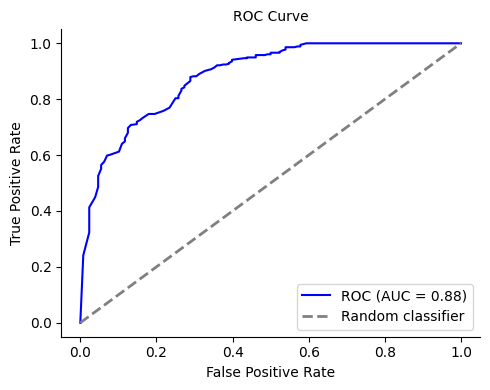

Limb: 1 Subject: 2 Youden Index: 0.6008245877061469 Sensitivity: 0.9456521739130435 Specificity: 0.6551724137931034
Limb: 2 Subject: 2 Youden Index: 0.5234219269102991 Sensitivity: 0.8662790697674418 Specificity: 0.6571428571428571
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.520


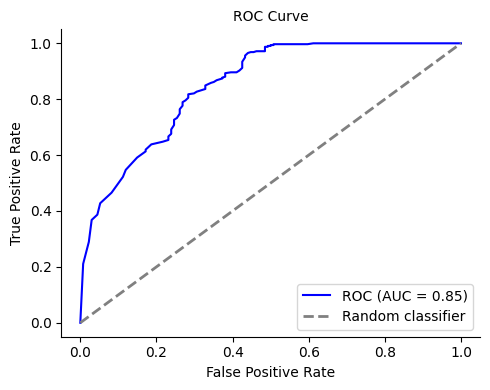

Limb: 1 Subject: 3 Youden Index: 0.7663043478260869 Sensitivity: 0.9619565217391305 Specificity: 0.8043478260869565
Limb: 2 Subject: 3 Youden Index: 0.2832428765264585 Sensitivity: 0.8059701492537313 Specificity: 0.4772727272727273
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.522


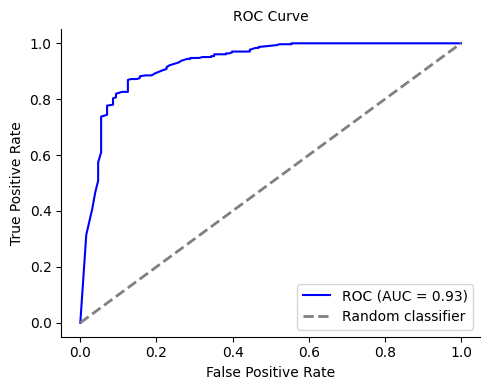

Limb: 1 Subject: 4 Youden Index: 0.729879518072289 Sensitivity: 0.9698795180722891 Specificity: 0.76
Limb: 2 Subject: 4 Youden Index: 0.6059767570558936 Sensitivity: 0.9136690647482014 Specificity: 0.6923076923076923
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.536


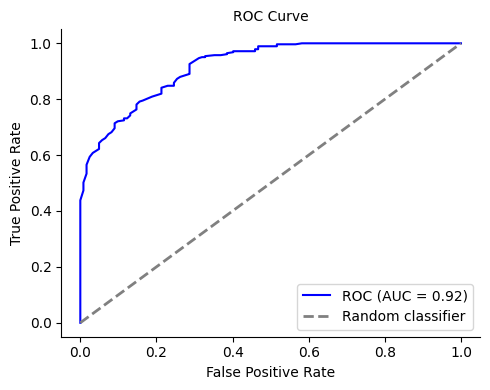

Limb: 1 Subject: 5 Youden Index: 0.8020833333333335 Sensitivity: 0.96875 Specificity: 0.8333333333333334
Limb: 2 Subject: 5 Youden Index: 0.5236788617886179 Sensitivity: 0.8861788617886179 Specificity: 0.6375
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.533


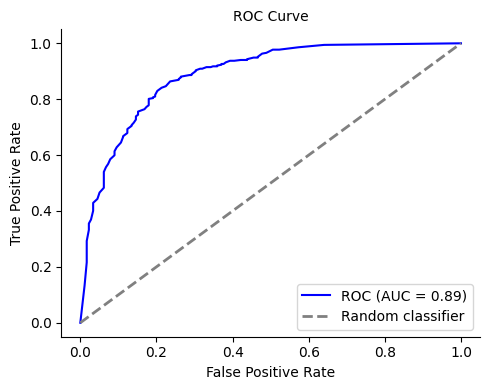

Limb: 1 Subject: 6 Youden Index: 0.6845524230219566 Sensitivity: 0.8938547486033519 Specificity: 0.7906976744186046
Limb: 2 Subject: 6 Youden Index: 0.5687358632822317 Sensitivity: 0.7861271676300579 Specificity: 0.782608695652174
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.544


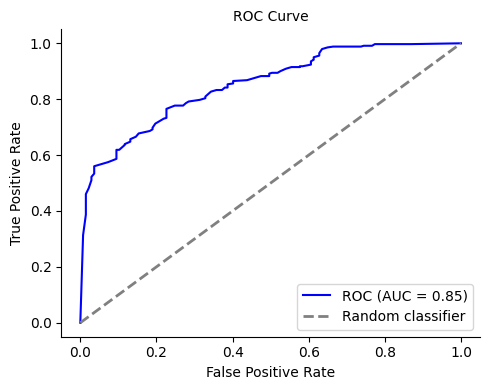

Limb: 1 Subject: 7 Youden Index: 0.4170646982197135 Sensitivity: 0.9489795918367347 Specificity: 0.46808510638297873
Limb: 2 Subject: 7 Youden Index: 0.3264367816091953 Sensitivity: 0.7931034482758621 Specificity: 0.5333333333333333
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.523


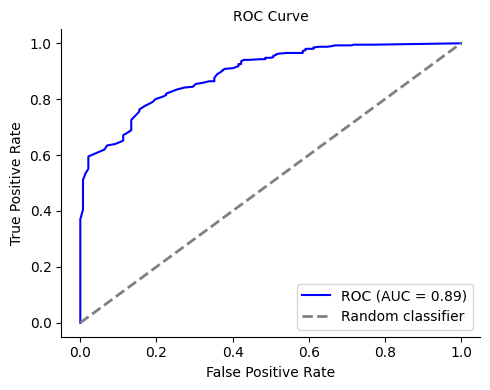

Limb: 1 Subject: 8 Youden Index: 0.6265699760765551 Sensitivity: 0.9234449760765551 Specificity: 0.703125
Limb: 2 Subject: 8 Youden Index: 0.4290947148090005 Sensitivity: 0.826530612244898 Specificity: 0.6025641025641025
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.504
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.519


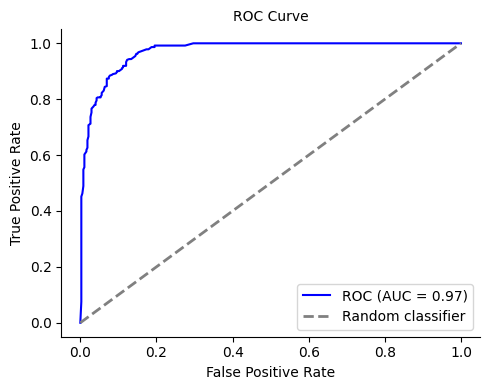

Limb: 1 Subject: 9 Youden Index: 0.8070036861506056 Sensitivity: 0.8625592417061612 Specificity: 0.9444444444444444
Limb: 2 Subject: 9 Youden Index: 0.6949490214461502 Sensitivity: 0.7515527950310559 Specificity: 0.9433962264150944
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.532


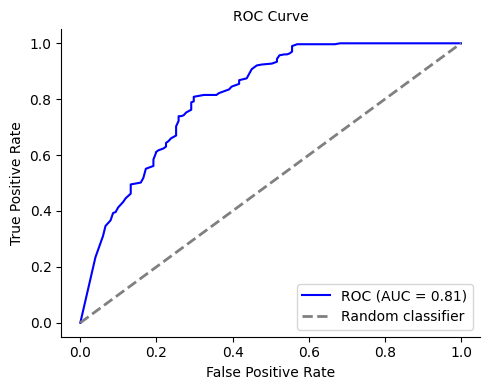

Limb: 1 Subject: 10 Youden Index: 0.5638098802395208 Sensitivity: 0.9700598802395209 Specificity: 0.59375
Limb: 2 Subject: 10 Youden Index: 0.2879479377958081 Sensitivity: 0.7132352941176471 Specificity: 0.5747126436781609
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.537


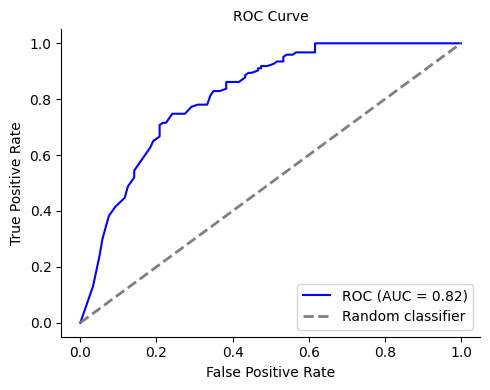

Limb: 3 Subject: 11 Youden Index: 0.2783400809716601 Sensitivity: 0.9230769230769231 Specificity: 0.35526315789473684
Limb: 4 Subject: 11 Youden Index: 0.5995670995670994 Sensitivity: 0.9404761904761905 Specificity: 0.6590909090909091
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.542


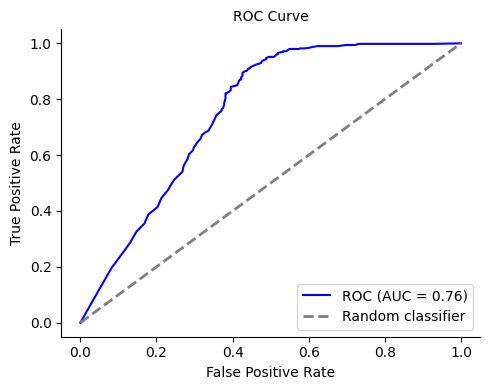

Limb: 3 Subject: 12 Youden Index: 0.35712784956403 Sensitivity: 0.8922155688622755 Specificity: 0.4649122807017544
Limb: 4 Subject: 12 Youden Index: 0.7865907099035931 Sensitivity: 0.9294478527607362 Specificity: 0.8571428571428571
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.515


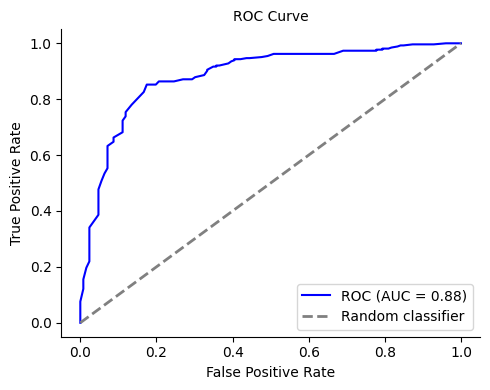

Limb: 3 Subject: 13 Youden Index: 0.48589743589743595 Sensitivity: 0.9692307692307692 Specificity: 0.5166666666666667
Limb: 4 Subject: 13 Youden Index: 0.5771144278606966 Sensitivity: 0.9104477611940298 Specificity: 0.6666666666666666
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.526


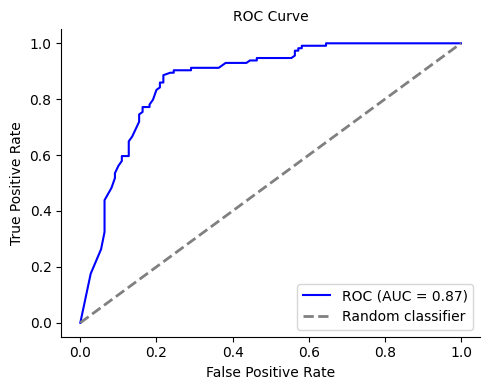

Limb: 3 Subject: 14 Youden Index: 0.5833333333333333 Sensitivity: 0.9166666666666666 Specificity: 0.6666666666666666
Limb: 4 Subject: 14 Youden Index: 0.4594232059020791 Sensitivity: 0.9523809523809523 Specificity: 0.5070422535211268
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x302821580>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x302821100>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x161d79670>, 'optimizer': 'nadam'} with score: 0.536


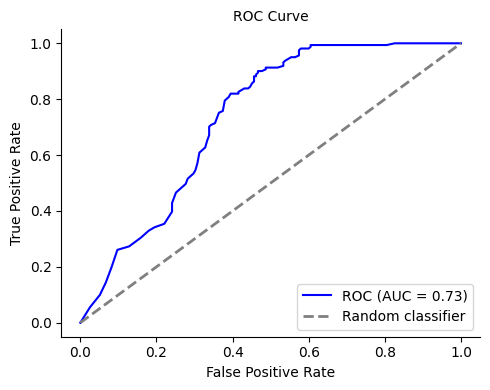

Limb: 3 Subject: 15 Youden Index: 0.6227722772277229 Sensitivity: 0.9 Specificity: 0.7227722772277227
Limb: 4 Subject: 15 Youden Index: 0.20917288995350147 Sensitivity: 0.9006622516556292 Specificity: 0.30851063829787234


In [2]:
approach = 1
filename = f'../results/approach1/generic_nested_cv.csv'

window_size = 100
epochs = 200
batch_size = 32

#For approach1, supervised (class_loss = True), unsupervised (class_loss = False)
class_loss = True
plot_hist = False

X = combined[['ax', 'ay', 'az']]
y = combined['gnd']
subjects = combined['subject']
limbs = combined['limb']

hp_grid = {
    'activation': ['tanh', 'relu'],
    'kernel_init': [tf.keras.initializers.HeNormal(seed=42)],
    'bias_init': [tf.keras.initializers.Zeros()],
    'optimizer': ['nadam'],
    'loss': [tf.keras.losses.mean_squared_error,],
    'learning_rate': [0.0001],
    'batch_norm': [True, False]
}
results_df, model, encoder, rf_model = run_nested_cv(window_size=window_size,
                           X=X,
                           y=y,
                           subjects=subjects,
                           limbs=limbs,
                           architecture=architecture,
                           hp_grid=hp_grid,
                           epochs=epochs,
                           batch_size=batch_size,
                           class_loss=class_loss,
                           plot_hist=plot_hist,
                           approach=approach)

limb_stats = results_df.groupby('limb')['youden_index'].agg(['mean', 'std']).round(4)

# print("\nYouden Index Statistics by Limb:")
# print(limb_stats)

In [3]:
print(results_df[['subject', 'youden_index']])
print(f"Mean Youden Index:{np.mean(results_df['youden_index'])}")

    subject  youden_index
0         1      0.633078
1         1      0.402277
2         2      0.600825
3         2      0.523422
4         3      0.766304
5         3      0.283243
6         4      0.729880
7         4      0.605977
8         5      0.802083
9         5      0.523679
10        6      0.684552
11        6      0.568736
12        7      0.417065
13        7      0.326437
14        8      0.626570
15        8      0.429095
16        9      0.807004
17        9      0.694949
18       10      0.563810
19       10      0.287948
20       11      0.278340
21       11      0.599567
22       12      0.357128
23       12      0.786591
24       13      0.485897
25       13      0.577114
26       14      0.583333
27       14      0.459423
28       15      0.622772
29       15      0.209173
Mean Youden Index:0.5412090591063908


In [4]:
s_times = []

for i in subjects.unique():
    subject_n = i
    y_test_w, y_pred_w, subj_ids_w, limb_ids_w, time_taken = time_rf_inference_for_subject(subject_n, 
                                                                                           X, 
                                                                                           y, 
                                                                                           subjects, 
                                                                                           limbs, 
                                                                                           encoder, 
                                                                                           rf_model, 
                                                                                           window_size)
    
    s_times.append(time_taken)

print(f"Average inference time for subjects {subjects.unique()}: {np.mean(s_times)} seconds")


Average inference time for subjects [11 12 13 14 15  2  3  4  5  6  7  8  9 10  1]: 0.10879751841227213 seconds
